In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from mnist import MNIST
from mlpalae import MlpAlae

In [3]:
mnist = MNIST()
alae = MlpAlae()

In [54]:
alae.load_weights('./ckpt/lat50_gam10_sepopt_seed_beta0_epoch50')

In [12]:
x_train, y_train = mnist.rawdata()
x_test, y_test = mnist.rawdata(train=False)

trainset = np.concatenate((x_train.reshape(-1, 784), np.eye(10)[y_train]), axis=-1)
testset = np.concatenate((x_test.reshape(-1, 784), np.eye(10)[y_test]), axis=-1)

In [60]:
[i for i, label in enumerate(y_train) if label == 3][:10]

[7, 10, 12, 27, 30, 44, 49, 50, 74, 86]

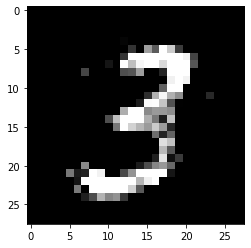

In [61]:
idx = 7
latent, image = alae(trainset[idx:idx + 1].reshape(1, 784 + 10))
plt.imshow(np.clip(image.numpy()[0, :784].reshape(28, 28), 0, 1), cmap='gray')

In [62]:
latent2 = alae.encoder(trainset[25:26].reshape(1, 784 + 10))
latent3 = alae.encoder(trainset[7:8].reshape(1, 784 + 10))

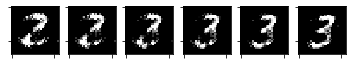

In [67]:
num = 5
delta = (latent3 - latent2) / num
fig, axs = plt.subplots(1, num + 1)

latent = latent2
for i in range(num + 1):
    image = alae.generator(latent).numpy()[0, :784].reshape(28, 28)
    plt.setp(axs[i].get_xticklabels(), visible=False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].imshow(np.clip(image, 0, 1), cmap='gray')
    latent += delta

plt.savefig('two2three')